Please upload the dataset file (CSV or ZIP format):


Saving US Airline Flight Routes and Fares 1993-2024.csv to US Airline Flight Routes and Fares 1993-2024 (6).csv

Dataset loaded successfully!
Shape: (245955, 23)

First 5 rows:
       tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                  

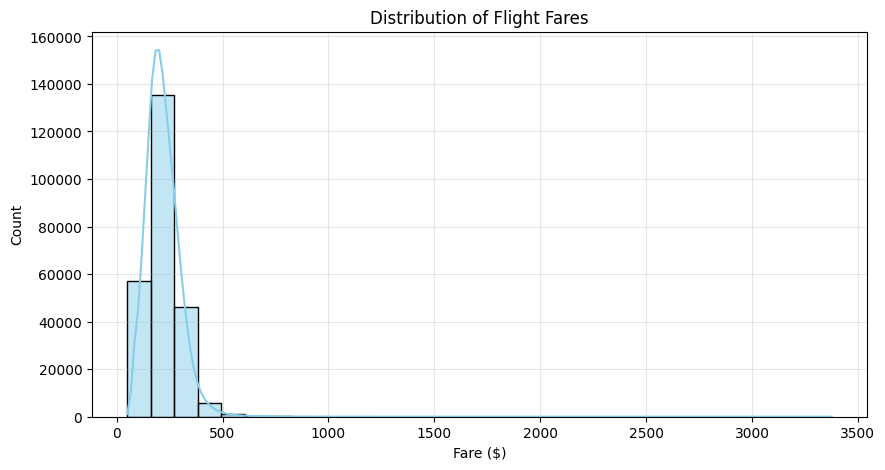

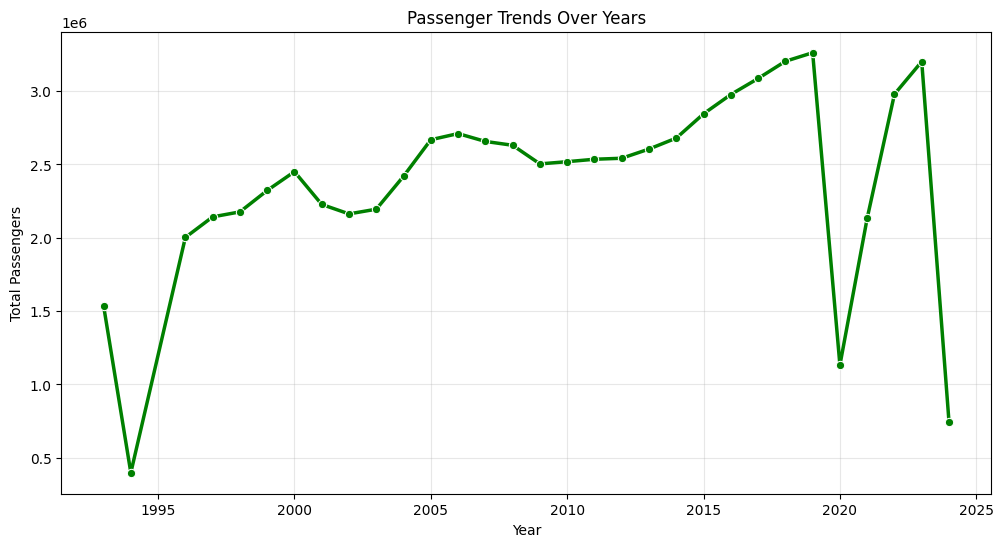

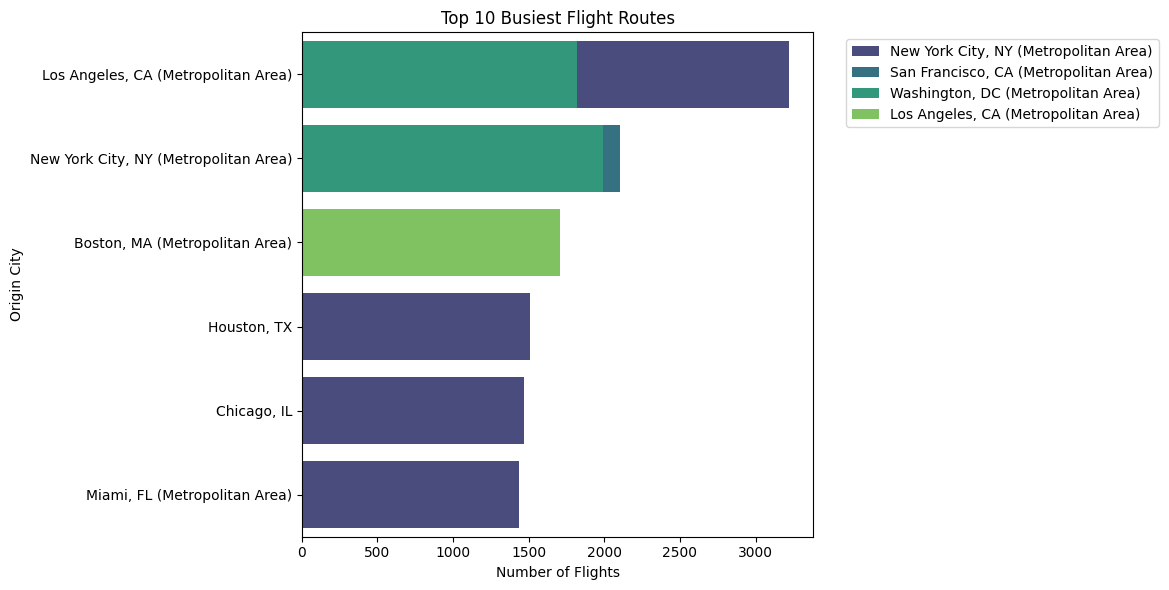

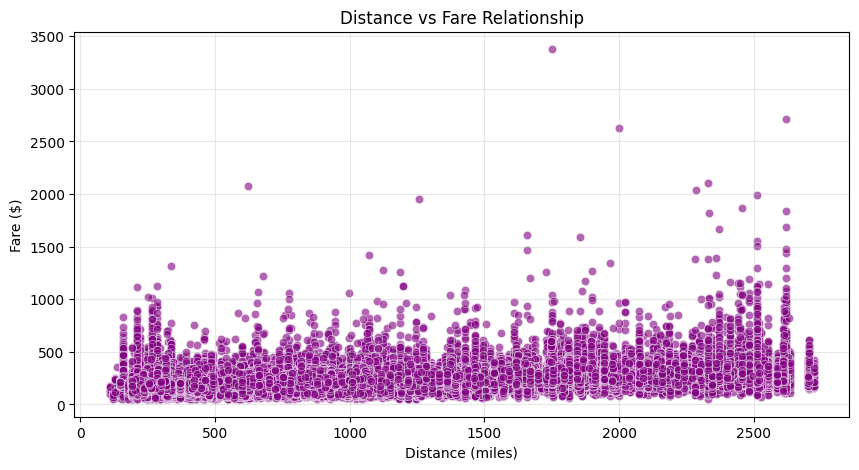

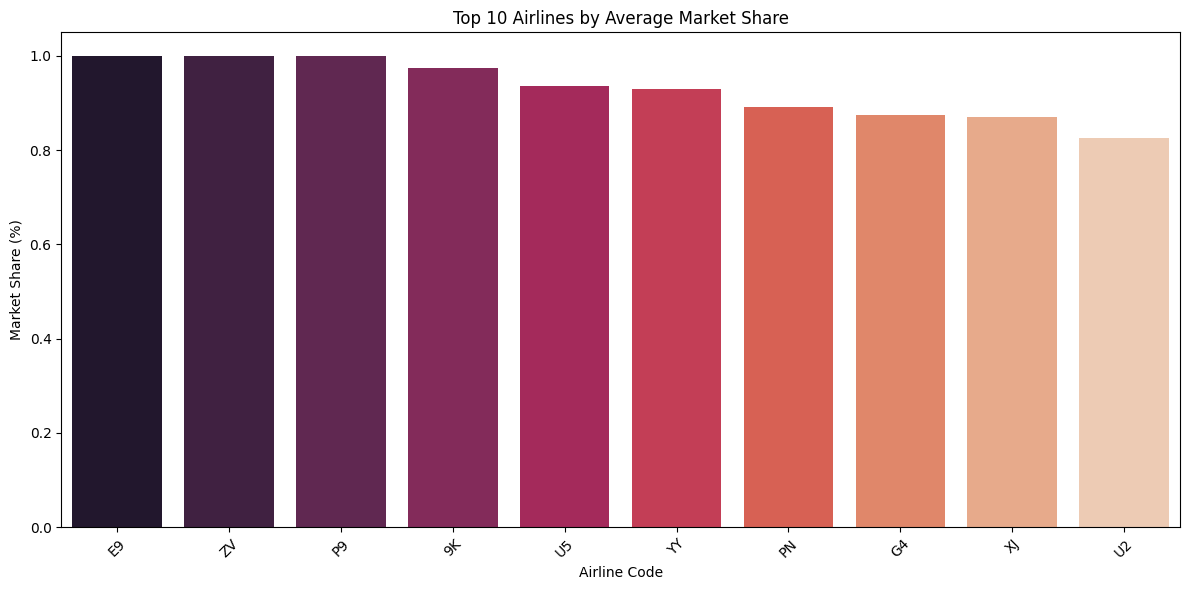

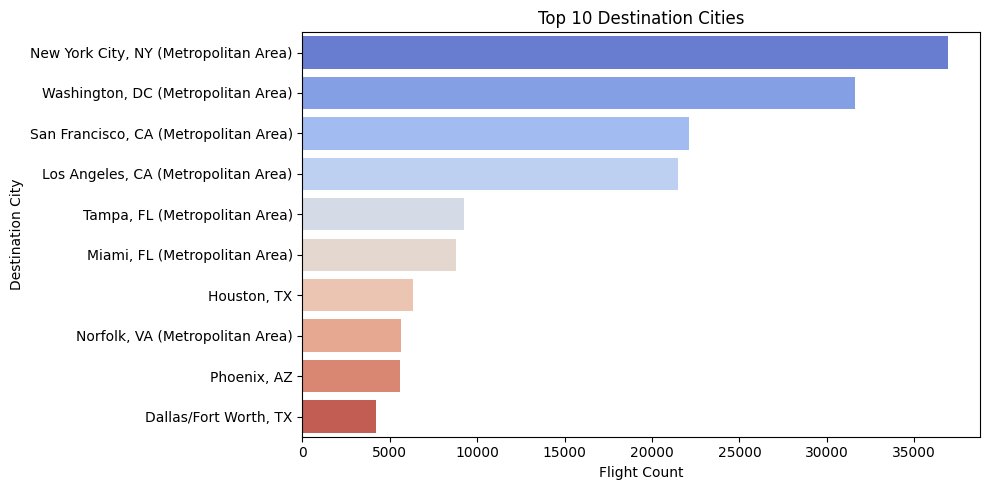

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from google.colab import files
import io
import zipfile
import os
import time

# Upload and read dataset
def load_data():
    print("Please upload the dataset file (CSV or ZIP format):")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    if file_name.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
            zip_ref.extractall("extracted")
            csv_files = [f for f in os.listdir("extracted") if f.endswith(".csv")]
            if csv_files:
                file_name = os.path.join("extracted", csv_files[0])
            else:
                raise FileNotFoundError("No CSV file found in the ZIP archive.")
    else:
        file_name = io.BytesIO(uploaded[file_name])

    try:
        return pd.read_csv(file_name, encoding='utf-8', low_memory=False)
    except UnicodeDecodeError:
        return pd.read_csv(file_name, encoding='ISO-8859-1', low_memory=False)

# Clean nulls and fix datatypes
def clean_data(df):
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['quarter'] = df['quarter'].astype('category')
    df = df.dropna(subset=['fare', 'passengers', 'nsmiles'])
    return df

# Fare spread across dataset
def plot_fare_distribution(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['fare'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Flight Fares")
    plt.xlabel("Fare ($)")
    plt.ylabel("Count")
    plt.grid(True, alpha=0.3)
    plt.show()
    print()
    time.sleep(1)

# Total passengers year-wise
def plot_passenger_trends(df):
    plt.figure(figsize=(12, 6))
    yearly_passengers = df.groupby('Year')['passengers'].sum().reset_index()
    sns.lineplot(data=yearly_passengers, x='Year', y='passengers', marker='o', color='green', linewidth=2.5)
    plt.title("Passenger Trends Over Years")
    plt.xlabel("Year")
    plt.ylabel("Total Passengers")
    plt.grid(True, alpha=0.3)
    plt.show()
    print()
    time.sleep(1)

# Top routes with most flights
def plot_top_routes(df):
    top_routes = df.groupby(['city1', 'city2']).size().nlargest(10).reset_index(name='count')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_routes, y='city1', x='count', hue='city2', dodge=False, palette='viridis')
    plt.title("Top 10 Busiest Flight Routes")
    plt.xlabel("Number of Flights")
    plt.ylabel("Origin City")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print()
    time.sleep(1)

# Compare distance and fare
def plot_distance_vs_fare(df):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x='nsmiles', y='fare', alpha=0.6, color='purple')
    plt.title("Distance vs Fare Relationship")
    plt.xlabel("Distance (miles)")
    plt.ylabel("Fare ($)")
    plt.grid(True, alpha=0.3)
    plt.show()
    print()
    time.sleep(1)

# Airline market share
def plot_carrier_market_share(df):
    plt.figure(figsize=(12, 6))
    carrier_share = df.groupby('carrier_lg', observed=False)['large_ms'].mean().nlargest(10).reset_index()
    sns.barplot(data=carrier_share, x='carrier_lg', y='large_ms', hue='carrier_lg', dodge=False, palette='rocket', legend=False)
    plt.title("Top 10 Airlines by Average Market Share")
    plt.xlabel("Airline Code")
    plt.ylabel("Market Share (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print()
    time.sleep(1)

# Popular arrival cities
def plot_top_destinations(df):
    if 'city2' in df.columns:
        top_destinations = df['city2'].value_counts().head(10).reset_index()
        top_destinations.columns = ['Destination City', 'Flight Count']
        plt.figure(figsize=(10, 5))
        sns.barplot(data=top_destinations, x='Flight Count', y='Destination City', hue='Destination City', dodge=False, palette='coolwarm', legend=False)
        plt.title('Top 10 Destination Cities')
        plt.tight_layout()
        plt.show()
        print()
        time.sleep(1)

# Run everything
def main():
    df = load_data()
    print("\nDataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print()

    df = clean_data(df)

    plot_fare_distribution(df)
    plot_passenger_trends(df)
    plot_top_routes(df)
    plot_distance_vs_fare(df)
    plot_carrier_market_share(df)
    plot_top_destinations(df)

if __name__ == "__main__":
    main()
